# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
df = pd.read_csv("car_data.csv")

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
df.shape

(804, 12)

In [ ]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [ ]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(804, 12)

In [ ]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [ ]:
iqr=df.Mileage.quantile(0.75)-df.Mileage.quantile(0.25)
lower=df.Mileage.quantile(0.25)-(iqr*1.5)
upper=df.Mileage.quantile(0.75)+(iqr*1.5)
lower,upper

(-1260.75, 41097.25)

In [ ]:
df.Mileage=df.Mileage.clip(-1260.75, 41097.25)

In [ ]:
iqr=df.Liter.quantile(0.75)-df.Liter.quantile(0.25)
lower=df.Liter.quantile(0.25)-(iqr*1.5)
upper=df.Liter.quantile(0.75)+(iqr*1.5)
lower,upper

(-0.1999999999999993, 6.199999999999999)

In [ ]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19807.086132,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8119.836852,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,41097.250000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


**Tasks, Part 1 (mileage vs price)**

In [ ]:
df[["Price","Mileage"]].corr()

,Price,Mileage
Price,1.000000,-0.146283
Mileage,-0.146283,1.000000


In [ ]:
df["transformed mileage"]=np.log(df["Mileage"])

In [ ]:
df[["Price","transformed mileage"]].corr()

,Price,transformed mileage
Price,1.000000,-0.146153
transformed mileage,-0.146153,1.000000


In [ ]:
X=df[["Mileage"]].values
y=df["Price"].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
scaled_X_train=scaler.transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [ ]:
df[["Price","Mileage"]].corr()

,Price,Mileage
Price,1.000000,-0.146283
Mileage,-0.146283,1.000000


tried transforming mileage column still it has no linear relation


modelling


In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_,regressor.coef_)

23493.530757134802 [-0.11525583]


In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
df1=pd.DataFrame({"actual":y_test,"prediction":y_pred})
df1

,actual,prediction
0,9919.048185,19503.258648
1,27060.137560,21497.415028
2,13600.034185,20354.999236
3,19204.809341,20441.902132
4,21982.647708,21134.013395
...,...,...
237,31024.872115,21917.061507
238,14185.021553,21145.308466
239,19822.115392,23310.043475
240,22661.048485,21176.312284


In [ ]:
from sklearn import metrics
regressor.score(X_test,y_test)

0.03586954480769555

here r2 value is almost equals to 0 due to no linear relation between mileage and price hence the equation is not good fit.


**equation for price vas mileage is price=-0.20532903(mileage)+25294.09594645612**


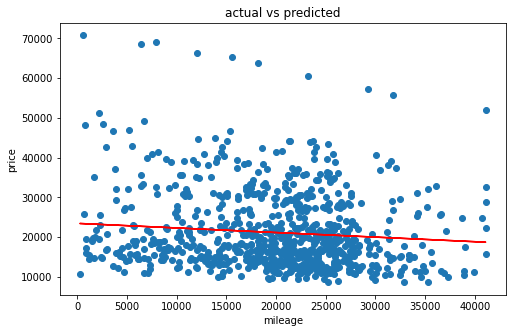

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(X,y)
plt.plot(X_test,y_pred,color="r")
plt.title("actual vs predicted")
plt.xlabel("mileage")
plt.ylabel("price")
plt.show()

value of **R2** is **-0.0011640157111103555**

**task2**

In [ ]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'transformed mileage'],
      dtype='object')

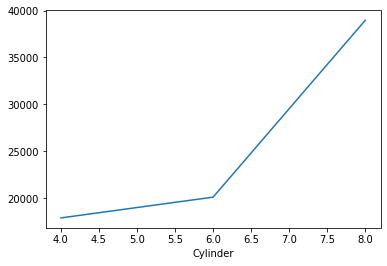

In [ ]:
#df.plot('Cylinder',"Price",style="o")
df.groupby("Cylinder")["Price"].mean().plot()
plt.show()

In [ ]:
df[['Cylinder','Price']].corr()

,Cylinder,Price
Cylinder,1.000000,0.569086
Price,0.569086,1.000000


**here cylinder and price and linear relation**

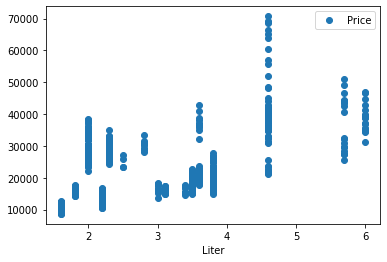

In [ ]:
df.plot('Liter','Price',style="o")

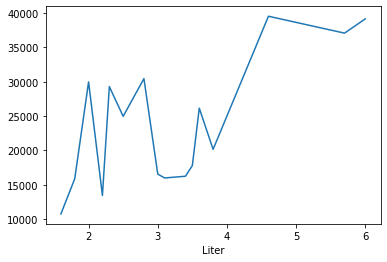

In [ ]:
df.groupby('Liter')["Price"].mean().plot()

In [ ]:
df[['Liter',"Price"]].corr()


,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


**here liter and price and linear relation**

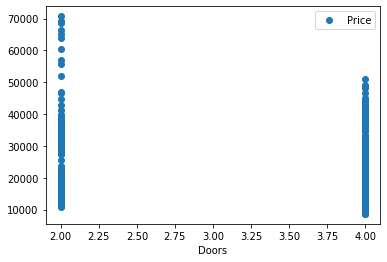

In [ ]:
df.plot("Doors","Price",style="o")


In [ ]:
df[["Doors","Price"]].corr()

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


In [ ]:
df["transformed Doors"]=np.square(df["Doors"])
df[["transformed Doors","Price"]].corr()

,transformed Doors,Price
transformed Doors,1.00000,-0.13875
Price,-0.13875,1.00000


In [ ]:
df["transformed Doors"]=np.power(df["Doors"],3)
df[["transformed Doors","Price"]].corr()

,transformed Doors,Price
transformed Doors,1.00000,-0.13875
Price,-0.13875,1.00000


In [ ]:
df["transformed Doors"]=np.exp(df["Doors"])
df[["transformed Doors","Price"]].corr()

,transformed Doors,Price
transformed Doors,1.00000,-0.13875
Price,-0.13875,1.00000


In [ ]:
df["transformed Doors"]=np.sqrt(df["Doors"])
df[["transformed Doors","Price"]].corr()

,transformed Doors,Price
transformed Doors,1.00000,-0.13875
Price,-0.13875,1.00000


there's no linear relation between doors and price even after ransformation

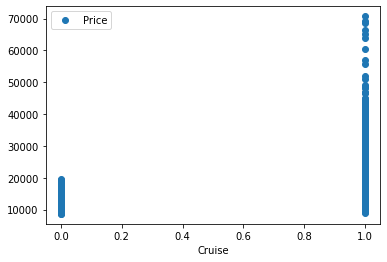

In [ ]:
df.plot('Cruise','Price',style='o')

In [ ]:
df[['Cruise','Price']].corr()

,Cruise,Price
Cruise,1.000000,0.430851
Price,0.430851,1.000000


linear relationship between cruise and price

,Sound,Price
Sound,1.000000,-0.124348
Price,-0.124348,1.000000


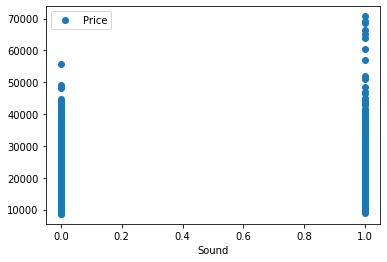

In [ ]:
df.plot('Sound','Price',style='o')
df[['Sound','Price']].corr()

In [ ]:
df["transformed sound"]=np.square(df['Sound'])
df[["transformed sound",'Price']].corr()

,transformed sound,Price
transformed sound,1.000000,-0.124348
Price,-0.124348,1.000000


In [ ]:
df["transformed sound"]=np.sqrt(df['Sound'])
df[["transformed sound",'Price']].corr()

,transformed sound,Price
transformed sound,1.000000,-0.124348
Price,-0.124348,1.000000


In [ ]:
df["transformed sound"]=np.power(df['Sound'],3)
df[["transformed sound",'Price']].corr()

,transformed sound,Price
transformed sound,1.000000,-0.124348
Price,-0.124348,1.000000


In [ ]:
df["transformed sound"]=np.exp(df['Sound'])
df[["transformed sound",'Price']].corr()

,transformed sound,Price
transformed sound,1.000000,-0.124348
Price,-0.124348,1.000000


no linear relationship between sound and price


,Leather,Price
Leather,1.000000,0.157197
Price,0.157197,1.000000


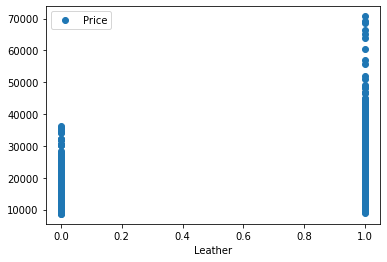

In [ ]:
df.plot('Leather','Price',style='o')
df[['Leather','Price']].corr()

In [ ]:
df['Leather_transform']=np.sqrt(df['Leather'])
df[['Leather_transform','Price']].corr()

,Leather_transform,Price
Leather_transform,1.000000,0.157197
Price,0.157197,1.000000


In [ ]:
df['Leather_transform']=np.square(df['Leather'])
df[['Leather_transform','Price']].corr()

,Leather_transform,Price
Leather_transform,1.000000,0.157197
Price,0.157197,1.000000


In [ ]:
df['Leather_transform']=np.exp(df['Leather'])
df[['Leather_transform','Price']].corr()

,Leather_transform,Price
Leather_transform,1.000000,0.157197
Price,0.157197,1.000000


In [ ]:
df['Leather_transform']=np.power(df['Leather'],3)
df[['Leather_transform','Price']].corr()

,Leather_transform,Price
Leather_transform,1.000000,0.157197
Price,0.157197,1.000000


no linear relationship between leather and price


In [ ]:
df=df.drop(columns= 'transformed mileage')

In [ ]:
df=df.drop(columns='transformed Doors')

In [ ]:
df=df.drop(columns='transformed sound')

In [ ]:
df=df.drop(columns='Leather_transform')

In [ ]:
X=df[['Mileage','Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather']].values
y=df['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,y_train)


LinearRegression()

In [ ]:
y_pred=linear.predict(X_test)

In [ ]:
df1=pd.DataFrame({"actual":y_test,"predicted":y_pred})
df1

,actual,predicted
16,19105.130124,23048.763156
313,15000.992710,12677.741822
579,15756.146130,19151.716906
767,15194.975354,15949.410612
56,19981.127911,19969.052064
...,...,...
729,24405.066760,15825.851782
284,12981.952029,17678.192758
656,30166.852512,19877.626384
662,27284.751328,18761.585102


In [ ]:
print(linear.coef_,linear.intercept_)

[-1297.25513673  5028.57036838  -559.86132612 -1428.16643658
  2572.92853877 -1380.52066838  1548.72426044] 21352.174469839803


In [ ]:
import sklearn.metrics
linear.score(X_test,y_test)

0.36597003124423577

**here since r2 value is 0.47 **

In [ ]:
coeff_df = pd.DataFrame(linear.coef_,['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], columns=['Coefficient'])
coeff_df

,Coefficient
Mileage,-1297.255137
Cylinder,5028.570368
Liter,-559.861326
Doors,-1428.166437
Cruise,2572.928539
Sound,-1380.520668
Leather,1548.724260


In [ ]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [ ]:
from itertools import combinations

In [ ]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [ ]:
def best_single_Feauture(data):
  all_r2=[]
  for i in list(combinations(data["Mileage","Cylinder","Cruise","Doors","Leather","Sound","Liter"],1)):
    print(i)
    X=data[list(i)].values
    y=data["Price"].values
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    from sklearn.preprocessing import StandardScaler
    scaler=StandardScaler()
    scaler.fit(X_train)
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)
    from sklearn.linear_model import LinearRegression
    linear=LinearRegression()
    linear.fit(X_train,y_train)
    import sklearn.metrics
    score=linear.score(X_test,y_test),i
    r2=all_r2.append(score)
    return max(r2)

In [ ]:
best_single_Feauture(df)

KeyError: ignored

In [ ]:
best_single_Feauture(df)

In [ ]:
list(combinations(["Mileage","Cylinder","Cruise","Doors","Leather","Sound","Liter"],3))

**task3**